In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
models_listofTuples  = [('lr',LogisticRegression()),
           ('knn',KNeighborsClassifier(n_neighbors=35)),
           ('decision',DecisionTreeClassifier()),
           ('svm_classifier', SVC()),
           ('gaussian_nb', GaussianNB())]
## used for Stacking

In [6]:
models_dict  = {'lr':LogisticRegression(),
           'knn':KNeighborsClassifier(n_neighbors=35),
           'decision':DecisionTreeClassifier(),
           'svm_classifier': SVC(),
           'gaussian_nb': GaussianNB()
          }
## used in cross_val_score

In [7]:
df = pd.read_csv('C:/Users/Lenovo/Documents/Documents/Data_Set/Iris.csv',index_col=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
ord_rank = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['Species_ordinal'] = df['Species'].map(ord_rank)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_ordinal
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=34, shuffle=True, test_size=0.3)

In [11]:
stacking_clf = StackingClassifier(estimators=models_listofTuples, cv=10, n_jobs=-1, )
stacking_clf.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=35)),
                               ('decision', DecisionTreeClassifier()),
                               ('svm_classifier', SVC()),
                               ('gaussian_nb', GaussianNB())],
                   n_jobs=-1)

In [12]:
y_perd = stacking_clf.predict(x_test)
stacking_clf.score(x_test, y_test)

0.9777777777777777

In [13]:
stacking_clf.stack_method_

['predict_proba',
 'predict_proba',
 'predict_proba',
 'decision_function',
 'predict_proba']

In [14]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=35)
    
    scores = cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    

In [15]:
models_dict

{'lr': LogisticRegression(),
 'knn': KNeighborsClassifier(n_neighbors=35),
 'decision': DecisionTreeClassifier(),
 'svm_classifier': SVC(),
 'gaussian_nb': GaussianNB()}

In [16]:

result = dict()
results = list()
for name, model in models_dict.items():
    scores = evaluate_model(model, X, y)
    result[name] = round(np.mean(scores), 4)
    results.append(scores)

In [17]:
result

{'lr': 0.9578,
 'knn': 0.9489,
 'decision': 0.9422,
 'svm_classifier': 0.9689,
 'gaussian_nb': 0.96}

In [19]:
results

[array([1.        , 1.        , 1.        , 0.86666667, 0.93333333,
        0.93333333, 1.        , 1.        , 1.        , 0.86666667,
        1.        , 1.        , 1.        , 1.        , 0.93333333,
        0.86666667, 1.        , 0.93333333, 0.93333333, 0.93333333,
        1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 1.        , 0.93333333, 0.8       , 1.        ]),
 array([0.93333333, 1.        , 1.        , 0.86666667, 0.93333333,
        1.        , 1.        , 1.        , 0.86666667, 0.86666667,
        1.        , 1.        , 0.93333333, 1.        , 0.93333333,
        0.86666667, 1.        , 0.93333333, 1.        , 0.86666667,
        1.        , 0.93333333, 0.93333333, 1.        , 0.93333333,
        0.93333333, 1.        , 1.        , 0.73333333, 1.        ]),
 array([1.        , 1.        , 1.        , 0.86666667, 0.93333333,
        0.93333333, 1.        , 1.        , 0.86666667, 0.8       ,
        1.        , 1.        , 1.        , 

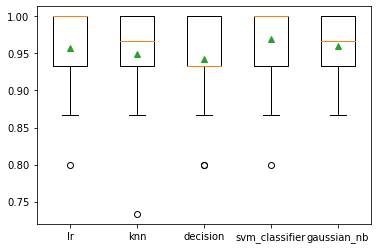

In [20]:
# plot model performance for comparison
plt.boxplot(results, labels=list(result.keys()), showmeans=True)
plt.show()

In [ ]:
type(list(result.keys()))

## Now let's check indiviual score vs the stacking score

In [45]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    
    stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    models_dict.update({'stacking':stack_model})
    return models_dict, model

In [46]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=35)
    scores = cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores

In [50]:
models_dict

{'lr': LogisticRegression(),
 'knn': KNeighborsClassifier(n_neighbors=35),
 'decision': DecisionTreeClassifier(),
 'svm_classifier': SVC(),
 'gaussian_nb': GaussianNB(),
 'stacking': StackingClassifier(cv=10,
                    estimators=[('lr', LogisticRegression()),
                                ('knn', KNeighborsClassifier()),
                                ('cart', DecisionTreeClassifier()),
                                ('svm', SVC()), ('bayes', GaussianNB())],
                    final_estimator=LogisticRegression())}

In [52]:
scores = dict()

result = dict()
for name, model in models_dict.items():
    score = evaluate_model(model, X, y)
    scores.update({name: score})
    result.update({name:round(np.mean(score),4)})

In [53]:
result

{'lr': 0.96,
 'knn': 0.9493,
 'decision': 0.944,
 'svm_classifier': 0.964,
 'gaussian_nb': 0.9573,
 'stacking': 0.9573}

In [55]:
scores

{'lr': array([1.        , 1.        , 1.        , 0.86666667, 0.93333333,
        0.93333333, 1.        , 1.        , 1.        , 0.86666667,
        1.        , 1.        , 1.        , 1.        , 0.93333333,
        0.86666667, 1.        , 0.93333333, 0.93333333, 0.93333333,
        1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 1.        , 0.93333333, 0.8       , 1.        ,
        0.93333333, 1.        , 0.93333333, 1.        , 0.93333333,
        1.        , 1.        , 1.        , 1.        , 0.8       ,
        1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
        1.        , 1.        , 0.86666667, 1.        , 0.93333333]),
 'knn': array([0.93333333, 1.        , 1.        , 0.86666667, 0.93333333,
        1.        , 1.        , 1.        , 0.86666667, 0.86666667,
        1.        , 1.        , 0.93333333, 1.        , 0.93333333,
        0.86666667, 1.        , 0.93333333, 1.        , 0.86666667,
        1.        , 0.93333333, 0

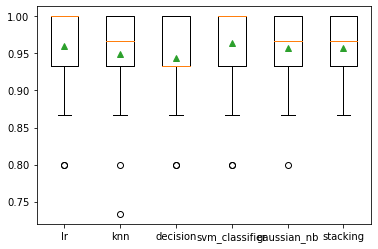

In [56]:
plt.boxplot(scores.values(), labels=list(scores.keys()), showmeans=True)
plt.show()

In [57]:
get_stacking()[0]

{'lr': LogisticRegression(),
 'knn': KNeighborsClassifier(n_neighbors=35),
 'decision': DecisionTreeClassifier(),
 'svm_classifier': SVC(),
 'gaussian_nb': GaussianNB(),
 'stacking': StackingClassifier(cv=10,
                    estimators=[('lr', LogisticRegression()),
                                ('knn', KNeighborsClassifier()),
                                ('cart', DecisionTreeClassifier()),
                                ('svm', SVC()), ('bayes', GaussianNB())],
                    final_estimator=LogisticRegression())}

In [58]:
get_stacking()[1]

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [60]:
result

{'lr': 0.96,
 'knn': 0.9493,
 'decision': 0.944,
 'svm_classifier': 0.964,
 'gaussian_nb': 0.9573,
 'stacking': 0.9573}